# Capstone Dummy Notebook
Owner: Jothika Sundaram
### This notebook contains the rough work of my Final Capstone Project. Here I will extract and clean data from various sources, perform various methods of exploratory analysis and draw any conclusions I find. 

### Data Requirements:

* City census data of Toronto and New York City
* Foursquare api location data


<h2><a id = "top"></a>Structure</h2><p> Click to jump to a section of the notebook</p>

1. <a href = "#item1"> Acquiring Census Data</a>

2. <a href = "#item2"> Acquiring Foursquare Data</a>

3. <a href = "#item3"> Creating a map of toronto </a>

4. <a href = "#item4"> Foursquare data for each Borough in Toronto</a>

5. <a href = "#item5"> Creating a Master Map for Toronto </a>

6. <a href = "#item6"> Analyzing Data from Master Map </a>   
    Sub item: <a href = "#sub item6"> Charts and Visuals </a>
    
7. <a href = "#item7"> Categories by Borough </a>  

In [29]:
import pandas as pd
import numpy as np
import json # library to handle JSON files
import requests # library to handle requests
import io
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
%matplotlib inline
import seaborn as sns

<h2><a id = 'item1'></a> Acquiring Census Data of Toronto and New York</h2>

This is census data of the neighbourhood profiles in Toronto. I'm not using any of this data right now but I may need it later.

In [32]:
url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv'
tor_data = pd.read_csv(url)
tor_data.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


This is population data of New York

In [33]:
url2 = 'https://www.baruch.cuny.edu/nycdata/population-geography/population.htm'
#https://www.baruch.cuny.edu/nycdata/population-geography/pop-demography.htm
demo = pd.read_html(url2)
demo[0].head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,Population & Geography,NaN
1,NaN,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,New York City and Greater Metropolitan Area P...,NaN
2,NaN,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,Back to Section,NaN
3,NaN,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,The Estimated 2018 Population of New York City...,NaN
4,NaN,County,2000,2010,% Change 2000-10,Estimates*,Estimates*,Estimates*,Estimates*,Estimates*,Estimates*,NaN


<h2><a id = "item2"></a> Acquiring Foursquare data </h2> <a href = "#top"> back to top </a>

#### Toronto:

In [34]:
CLIENT_ID = 'NA0Q3HAIZG5G1XDGDI5ZCGQPBSNEP4SGYF5B0ULTZBDZHIOV' # your Foursquare ID
CLIENT_SECRET = 'HNVACZRJK5KNIEWX0IBRFZI0U3AG5NH1MUSWVUXBDWBFTU1J' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NA0Q3HAIZG5G1XDGDI5ZCGQPBSNEP4SGYF5B0ULTZBDZHIOV
CLIENT_SECRET:HNVACZRJK5KNIEWX0IBRFZI0U3AG5NH1MUSWVUXBDWBFTU1J


In [35]:
# latitude and longitude of Toronto
tor_name = 'Toronto'
tor_lat = 43.6532
tor_lon = -79.3832
print('Latitude and longitude values of {} are {}, {}.'.format(tor_name, 
                                                               tor_lat, 
                                                               tor_lon))

Latitude and longitude values of Toronto are 43.6532, -79.3832.


### Explore venues in Toronto within 500 m radius


In [36]:
LIMIT = 500
radius = 10000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    tor_lat, 
    tor_lon,
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=NA0Q3HAIZG5G1XDGDI5ZCGQPBSNEP4SGYF5B0ULTZBDZHIOV&client_secret=HNVACZRJK5KNIEWX0IBRFZI0U3AG5NH1MUSWVUXBDWBFTU1J&v=20180605&ll=43.6532,-79.3832&radius=10000&limit=500'

In [37]:
results = requests.get(url).json()

In [38]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [39]:
# results

In [40]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng,postalCode
0,Downtown Toronto,Neighborhood,43.653232,-79.385296,NaN
1,Elgin And Winter Garden Theatres,Theater,43.653394,-79.378507,M5B 2H1
2,Hailed Coffee,Coffee Shop,43.658833,-79.383684,M5G
3,Nathan Phillips Square,Plaza,43.652270,-79.383516,M5H 2N1
4,Richmond Station,American Restaurant,43.651569,-79.379266,NaN


Can extract postal codes of each venue (except those that dont have one)

Can scrape this site to get boroughs of each postal code area and then merge the two tables together

In [41]:
postal_codes = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
postal_codes = postal_codes[0]

In [42]:
postal_codes.dropna(inplace = True)

In [44]:
postal_codes.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [45]:
codes = nearby_venues['postalCode']


In [46]:
# split the postal code values to we just get the area code
for i in range(len(codes)):
    if not pd.isnull(codes[i]):
        codes[i] = codes[i].split()[0]
        

c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [47]:
len(codes)

100

In [48]:
postal_codes.set_index('Postal Code',inplace = True)

Create an array to store boroughs

#### This function takes a dataframe containing Foursquare data and will find the Borough location of each venue using its assigned postal code

In [49]:
def get_postal_borough(dataframe):
    borough = []
    codes = dataframe['postalCode']
    # split the postal code values to we just get the area code
    for i in range(len(codes)):
        if not pd.isnull(codes[i]):
            codes[i] = codes[i].split()[0]
    
    
    for i in range(len(codes)):
        if not pd.isnull(codes[i]) and codes[i] in postal_codes.index:
            borough.append(postal_codes.at[codes[i],'Borough'])
        else:
            borough.append('not assigned')
    return borough

Add this array as a column to the dataframe

In [50]:
nearby_venues['Borough'] = get_postal_borough(nearby_venues)

c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [51]:
nearby_venues.head(10)

,name,categories,lat,lng,postalCode,Borough
0,Downtown Toronto,Neighborhood,43.653232,-79.385296,NaN,not assigned
1,Elgin And Winter Garden Theatres,Theater,43.653394,-79.378507,M5B,Downtown Toronto
2,Hailed Coffee,Coffee Shop,43.658833,-79.383684,M5G,Downtown Toronto
3,Nathan Phillips Square,Plaza,43.652270,-79.383516,M5H,Downtown Toronto
4,Richmond Station,American Restaurant,43.651569,-79.379266,NaN,not assigned
5,Fahrenheit Coffee,Coffee Shop,43.652384,-79.372719,M5C,Downtown Toronto
6,Byblos Toronto,Mediterranean Restaurant,43.647615,-79.388381,M5V,Downtown Toronto
7,Hogtown Smoke,Food Truck,43.649287,-79.374689,M4L,East Toronto
8,St. Lawrence Market (South Building),Farmers Market,43.648743,-79.371597,M5E,Downtown Toronto
9,Alo,French Restaurant,43.648574,-79.396243,M5V,Downtown Toronto


<h2><a id = "item3"></a> Map of Toronto </h2><a href = "#top"> back to top </a>

In [52]:
# !conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
print('Folium imported')

Folium imported


In [53]:
map_toronto = folium.Map(location=[tor_lat, tor_lon], zoom_start=10)

for lat, lng, postal, borough, name in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['postalCode'],nearby_venues['Borough'], nearby_venues['name']):
    label = '{},{}'.format(name,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<h2><a id = "item4"></a> Foursquare data for each Borough in Toronto</h2><a href = "#top"> back to top </a>

### I want to repeat this process for every borough in Toronto

In [54]:
unique_boroughs = postal_codes['Borough'].drop_duplicates()

In [55]:
# !conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [56]:
address = 'Etobicoke, Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates are {}, {}.'.format(latitude, longitude))

The geograpical coordinates are 43.6435559, -79.5656326.


#### This function uses the geocoders api to retrieve the coordinates of each borough in Toronto

In [57]:
def get_borough_coords():
    borough_coords = []
    for i in range(len(unique_boroughs)):
        address = unique_boroughs[i]+', Toronto'

        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
#         print('The geograpical coordinates of ' + unique_boroughs[i] + ' are {}, {}.'.format(latitude, longitude))
        borough_coords.append([unique_boroughs[i],latitude,longitude])
        
    return borough_coords

In [58]:
borough_coords = get_borough_coords()

In [59]:
borough_coords

[['North York', 43.7543263, -79.44911696639593],
 ['Downtown Toronto', 43.6541737, -79.38081164513409],
 ['Etobicoke', 43.6435559, -79.5656326],
 ['Scarborough', 43.773077, -79.257774],
 ['East York', 43.699971000000005, -79.33251996261595],
 ['York', 43.67910515, -79.49118414007154],
 ['East Toronto', 43.6534817, -79.3839347],
 ['West Toronto', 43.6534817, -79.3839347],
 ['Central Toronto', 43.6534817, -79.3839347],
 ['Mississauga', 43.678523999999996, -79.62912913064454]]

The geocoders data returned the same coordinates for East Toronto, West Toronto and Central Toronto. We may decide to drop the duplicate coordinates later on and just focus on one of those three areas.  
Lets turn this into a dataframe.

In [60]:
coords_df = pd.DataFrame(borough_coords, columns = ['Borough','Lat','Lon'])
coords_df.drop_duplicates(subset = ['Lat','Lon'],inplace = True)
coords_df.reset_index(inplace = True)
coords_df.drop(columns = ['index'],inplace = True)
coords_df

,Borough,Lat,Lon
0,North York,43.754326,-79.449117
1,Downtown Toronto,43.654174,-79.380812
2,Etobicoke,43.643556,-79.565633
3,Scarborough,43.773077,-79.257774
4,East York,43.699971,-79.332520
5,York,43.679105,-79.491184
6,East Toronto,43.653482,-79.383935
7,Mississauga,43.678524,-79.629129


In [86]:
master_df = pd.DataFrame(columns = ['name','categories','lat','lng','postalCode','Borough'])

In [87]:
master_df

,name,categories,lat,lng,postalCode,Borough


#### This function creates a dataframe for each borough with the available information retrieved from the Foursquare api, and returns a merged dataframe containing information for each borough  
Limit of 500 venues in a 10 km radius

In [88]:
def get_4square_for_boroughs(): #This is how we can merge multiple dataframes into one master frame
    i = 0
    frames = []
    while i < coords_df.shape[0]:
        lat = coords_df.loc[i,'Lat']
        lon = coords_df.loc[i,'Lon']
        LIMIT = 500
        radius = 10000
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lon,
            radius, 
            LIMIT)
    #         url # display URL
    #     return url
        results = requests.get(url).json()
        venues = results['response']['groups'][0]['items']

        df = json_normalize(venues) # flatten JSON

        # filter columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode']
        df =df.loc[:, filtered_columns]

        # filter the category for each row
        df['venue.categories'] = df.apply(get_category_type, axis=1)

        # clean columns
        df.columns = [col.split(".")[-1] for col in df.columns]

        # create a Borough column using the get_postal_borough funtion
        df['Borough'] = get_postal_borough(df)
        frames.append(df)
        i+=1
    return pd.concat(frames)

In [89]:
master_df = get_4square_for_boroughs()

c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
c:\users\jothika pc\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [67]:
 master_df.reset_index(inplace = True)

In [90]:
master_df.head()

,name,categories,lat,lng,postalCode,Borough
0,Earl Bales Park,Park,43.753043,-79.436228,NaN,not assigned
1,Archers Arena,Recreation Center,43.754101,-79.467200,M3K,North York
2,Best for Bride in Toronto,Bridal Shop,43.755789,-79.437834,M3H,North York
3,LCBO,Liquor Store,43.732717,-79.454717,M3K,North York
4,True North Climbing,Climbing Gym,43.745507,-79.474332,M3K,North York


Now we have the venue information that was available from each Borough.  There are many venues that are not assigned a Borough, we might drop these values later.  
We can also see that a large majority of these venues are coming from Downtown Toronto. 

<h2><a id = "item5"></a> Let's Create a Master Map </h2> <a href = '#top'> back to top </a>

This map will show the available venue data from all Boroughs in Toronto

In [91]:
master_map = folium.Map(location=[tor_lat, tor_lon], zoom_start=12)

for lat, lng, postal, borough, name in zip(master_df['lat'], master_df['lng'], master_df['postalCode'],master_df['Borough'], master_df['name']):
    label = '{},{}'.format(name,borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(master_map)  
    
master_map

Now we can view the venues located in each borough

<h2><a id = 'item6'></a> Analyzing Data from Master Map </h2> <a href = "#top">back to top</a>

#### Let's do some data analysis from all these venues

In [92]:
master_df['categories'].unique()

array(['Park', 'Recreation Center', 'Bridal Shop', 'Liquor Store',
       'Climbing Gym', 'Clothing Store', 'Japanese Restaurant',
       'Furniture / Home Store', 'Hotel', 'Café', 'French Restaurant',
       'Steakhouse', 'Chocolate Shop', 'Bookstore', 'Shopping Mall',
       'Airport', 'Sandwich Place', 'Ramen Restaurant',
       'Seafood Restaurant', 'Theater', 'Grocery Store', 'Massage Studio',
       'Hockey Arena', 'Warehouse Store', 'Thai Restaurant', 'Creperie',
       'Racetrack', 'Dessert Shop', 'Tea Room',
       'Middle Eastern Restaurant', 'Sushi Restaurant', 'Bakery',
       'Athletics & Sports', 'Supermarket', 'Vietnamese Restaurant',
       'Music Store', 'Flower Shop', 'Coffee Shop', 'Bagel Shop',
       'Korean Restaurant', 'Gastropub', 'Auto Dealership',
       'Bubble Tea Shop', 'Pizza Place', 'Garden', 'Deli / Bodega',
       'Gourmet Shop', 'Pharmacy', 'Field', 'Toy / Game Store',
       'Health Food Store', 'Italian Restaurant', 'Falafel Restaurant',
       'Vege

In [93]:
len(master_df['categories'].unique())

153

We have 153 unique categories. Lets clean some of this data up.  
Looking at the unique categories, we can immediately see that Toronto is dominated by **restaurant chains**. Lets focus on those venues for now.

In [94]:
master_df[master_df['categories']=="Restaurant"]

,name,categories,lat,lng,postalCode,Borough
87,ANI Ristorante,Restaurant,43.798246,-79.470062,L4J,not assigned
8,GEORGE Restaurant,Restaurant,43.653346,-79.374445,M5C,Downtown Toronto
61,Impact Kitchen,Restaurant,43.656369,-79.356980,M5A,Downtown Toronto
65,Rasa,Restaurant,43.662757,-79.403988,M5S,Downtown Toronto
17,The Keg Steakhouse + Bar - Sherway,Restaurant,43.613148,-79.559466,M9C,Etobicoke
31,The Pie Commission,Restaurant,43.623548,-79.512265,M8Z,Etobicoke
83,The Keg Steakhouse + Bar - Dixon Road,Restaurant,43.686329,-79.597353,M9W,Etobicoke
55,The Keg Steakhouse + Bar – Estate Drive,Restaurant,43.782573,-79.235046,M1H,Scarborough
73,Impact Kitchen,Restaurant,43.656369,-79.356980,M5A,Downtown Toronto
46,Rasa,Restaurant,43.662757,-79.403988,M5S,Downtown Toronto


We can see that restuarants that aren't under an ethnic category are mostly steakhouses and other restaurants. We can categorize them under "Other"

Lets make a dataframe that only contains restaurant venues

In [95]:
restaurants =[]
for i in master_df['categories']:
    if("Restaurant" in i):
        if len(i.split())==1:
            restaurants.append("Other")
        else:
            restaurants.append(i)

In [96]:
restaurants_df = pd.DataFrame(restaurants)
restaurants_df.count()

0    190
dtype: int64

In [97]:
restaurants_df[0].unique()

array(['Japanese Restaurant', 'French Restaurant', 'Ramen Restaurant',
       'Seafood Restaurant', 'Thai Restaurant',
       'Middle Eastern Restaurant', 'Sushi Restaurant',
       'Vietnamese Restaurant', 'Korean Restaurant', 'Italian Restaurant',
       'Falafel Restaurant', 'Vegetarian / Vegan Restaurant', 'Other',
       'Doner Restaurant', 'American Restaurant',
       'Mediterranean Restaurant', 'Mexican Restaurant',
       'Tapas Restaurant', 'Fast Food Restaurant',
       'Eastern European Restaurant', 'New American Restaurant',
       'Turkish Restaurant', 'Kebab Restaurant', 'Asian Restaurant',
       'Caribbean Restaurant', 'Xinjiang Restaurant', 'Indian Restaurant',
       'Greek Restaurant', 'Sri Lankan Restaurant', 'Chinese Restaurant',
       'Cantonese Restaurant', 'Filipino Restaurant', 'Hakka Restaurant',
       'Ethiopian Restaurant', 'Afghan Restaurant'], dtype=object)

In [98]:
restaurants_df = pd.DataFrame(restaurants_df.groupby(by=[0]).size())

In [99]:
restaurants_df.rename(columns={0: "Count"},inplace = True)

In [100]:
restaurants_df.reset_index(inplace = True)

In [101]:
restaurants_df.rename(columns={0: "Category"},inplace = True)

<h3><a id = "sub item6"></a> Charts and Visuals </h3><a href = "#top">back to top</a>

Lets create a barchart to visualize the frequency of these categories

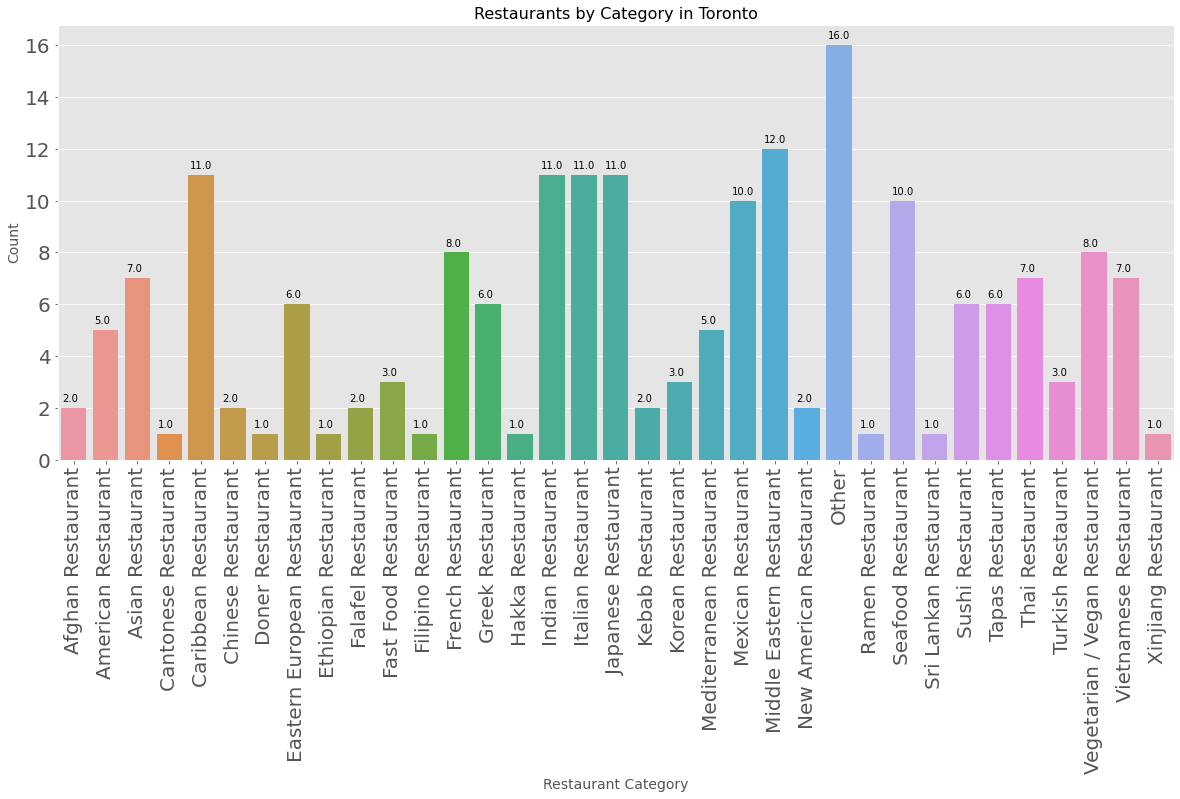

In [102]:
import matplotlib.patches as patches
plt.figure(figsize = (20,8))
ax = sns.barplot(x="Category",y="Count",data = restaurants_df)
ax.set_xlabel('Restaurant Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

ax.set_title('Restaurants by Category in Toronto',fontsize = 16) # set title and labels

ax.tick_params(labelsize=20)
plt.xticks(rotation=90)


for num in ax.patches:# labels ontop of each bar
    width, height = num.get_width(), num.get_height()
    x, y = num.get_xy()
    ax.annotate('{}'.format(height), (x+0.05, y + height + 0.25))

We can see that out of the 186 restaurants in the dataframe, most of them fall under the "Other" category, followed by Middle Eastern restaurant with a frequency of 12. Indian, Italian, Japanese and Carribean restaurants are also of high frequency. This might give us an idea about the ethnic populations that lives in those areas.   
#### Next, lets compare the other venue categories. Since we already know that restaurant venues have the highest population with 190 venues, we can ignore that category

In [103]:
all_categories = []

In [104]:
for i in master_df['categories']:
    if("Restaurant" in i):
        continue
    else:
        all_categories.append(i)

In [105]:
categories_df = pd.DataFrame(all_categories,columns = ['Category'])

In [106]:
categories_df

,Category
0,Park
1,Recreation Center
2,Bridal Shop
3,Liquor Store
4,Climbing Gym
...,...
605,Liquor Store
606,Garden
607,Donut Shop
608,Grocery Store


In [107]:
categories_df = pd.DataFrame(categories_df.groupby(by=['Category']).size())

In [108]:
categories_df.rename(columns = {0:'Count'},inplace = True)

In [109]:
categories_df.reset_index(inplace = True)

In [110]:
categories_df.head()

,Category,Count
0,Airport,1
1,Airport Lounge,2
2,Arts & Crafts Store,7
3,Athletics & Sports,5
4,Auto Dealership,1


Lets create a bar chart to see the frequencies of all categories

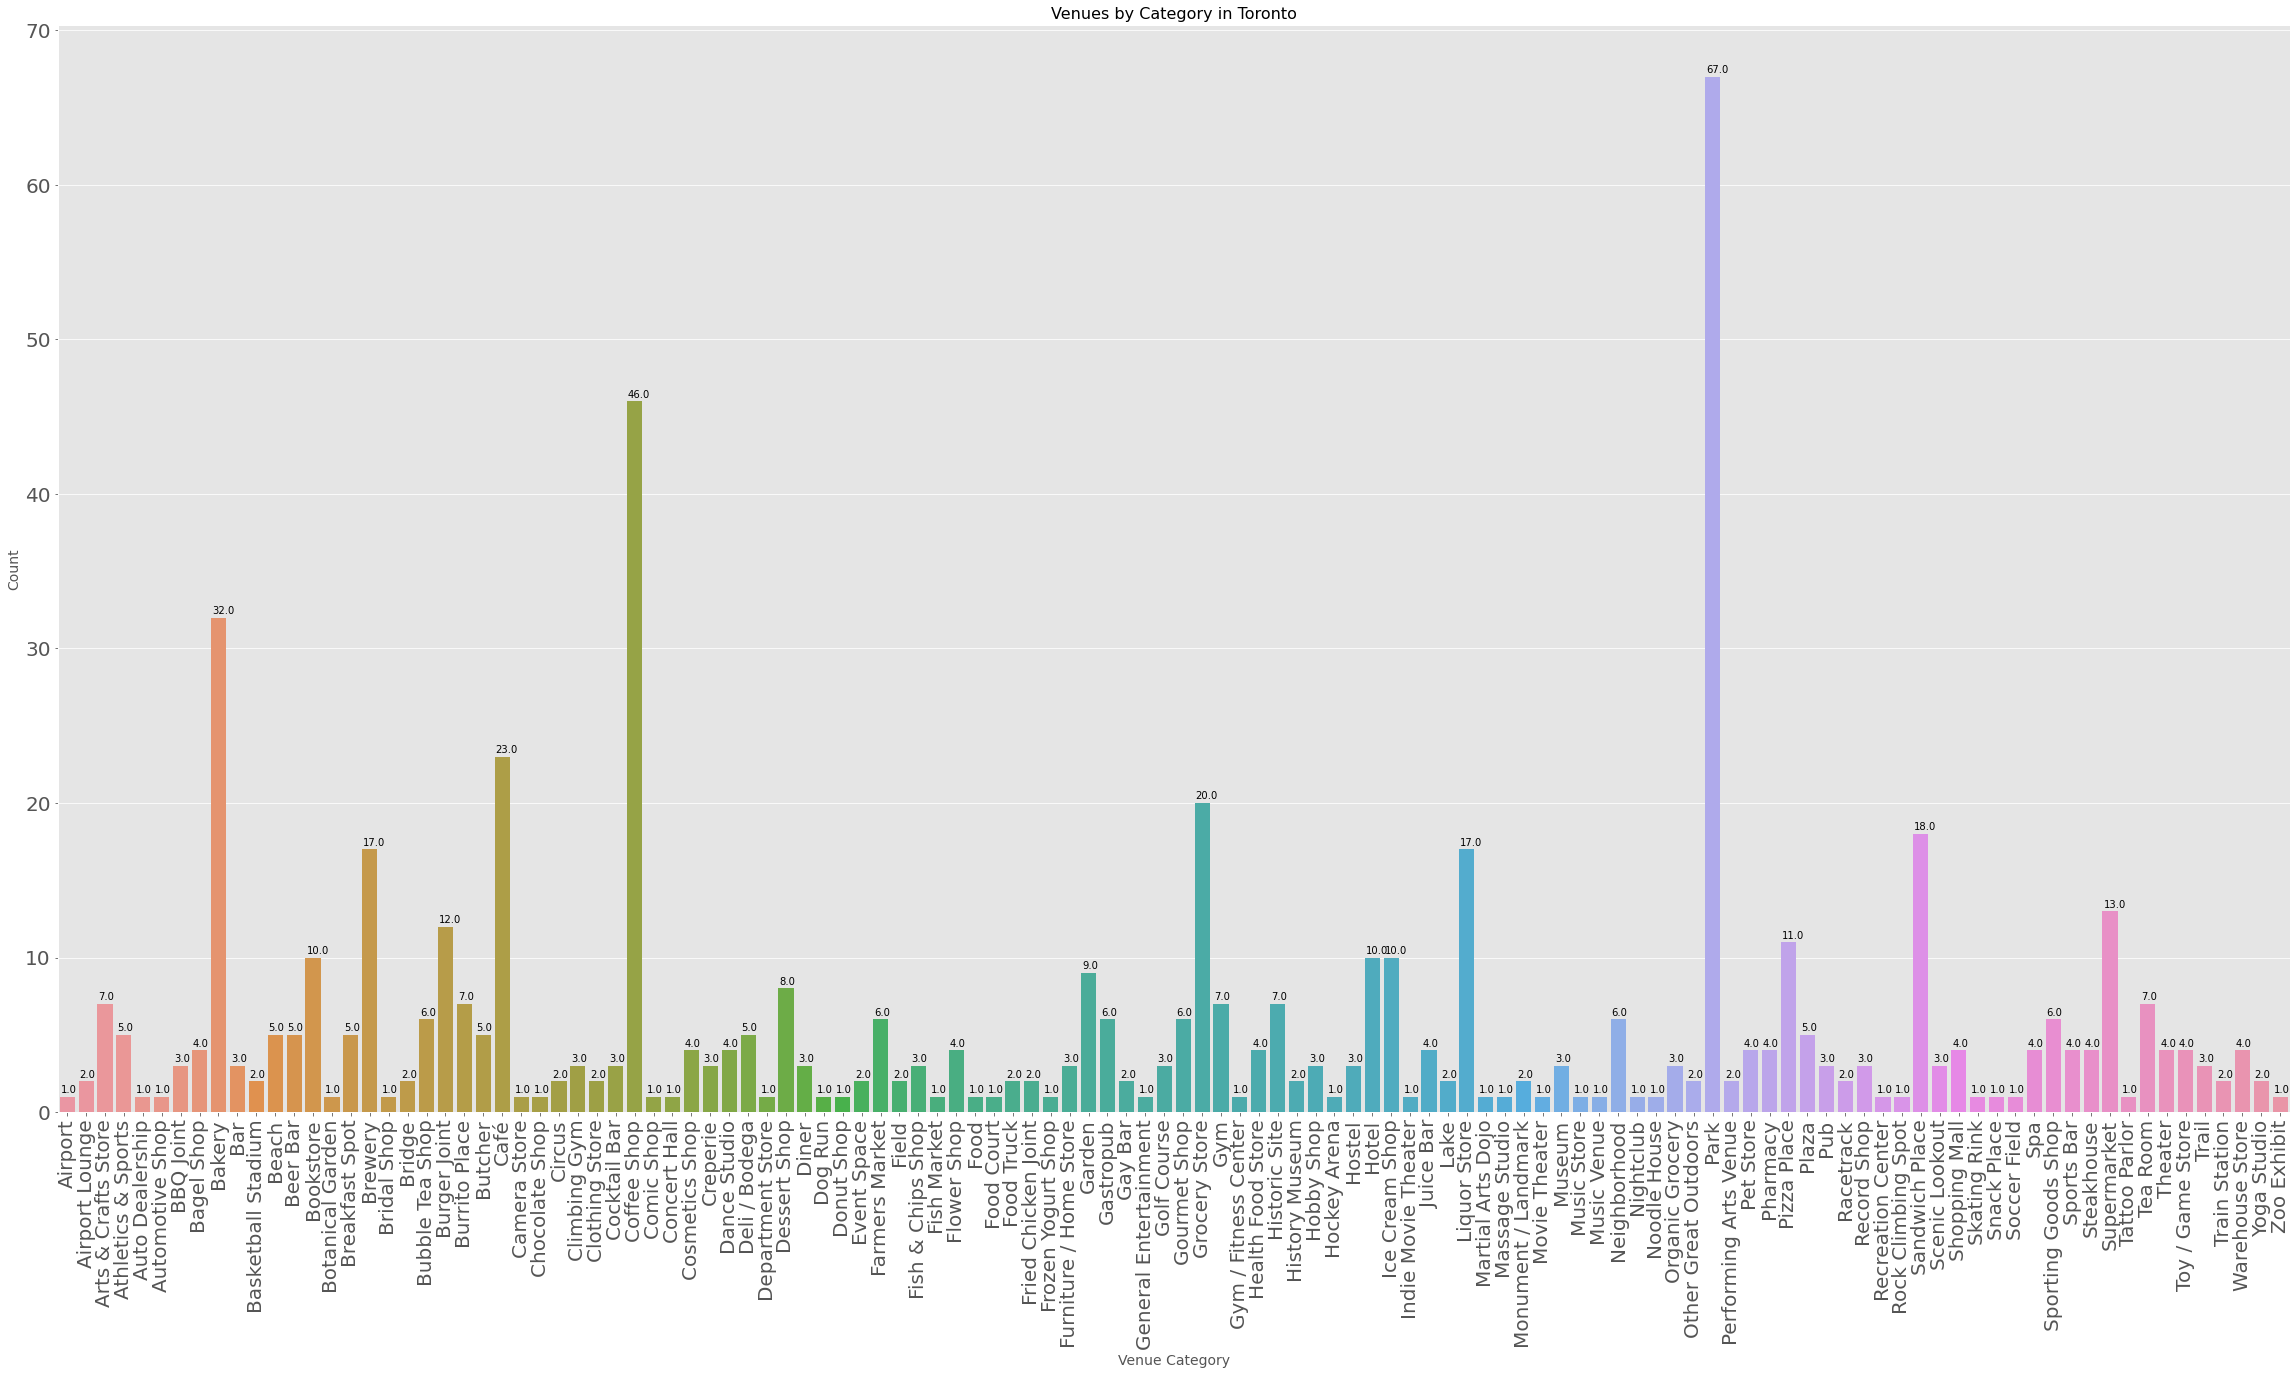

In [111]:
plt.figure(figsize = (40,20))
ax = sns.barplot(x="Category",y="Count",data = categories_df)
ax.set_xlabel('Venue Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

ax.set_title('Venues by Category in Toronto',fontsize = 16) # set title and labels

ax.tick_params(labelsize=20)
plt.xticks(rotation=90)


for num in ax.patches:# labels ontop of each bar
    width, height = num.get_width(), num.get_height()
    x, y = num.get_xy()
    ax.annotate('{}'.format(height), (x+0.05, y + height + 0.25))

The chart is overwhelmed with the number of categories. Maybe we should break them down.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text major ticklabel objects>)

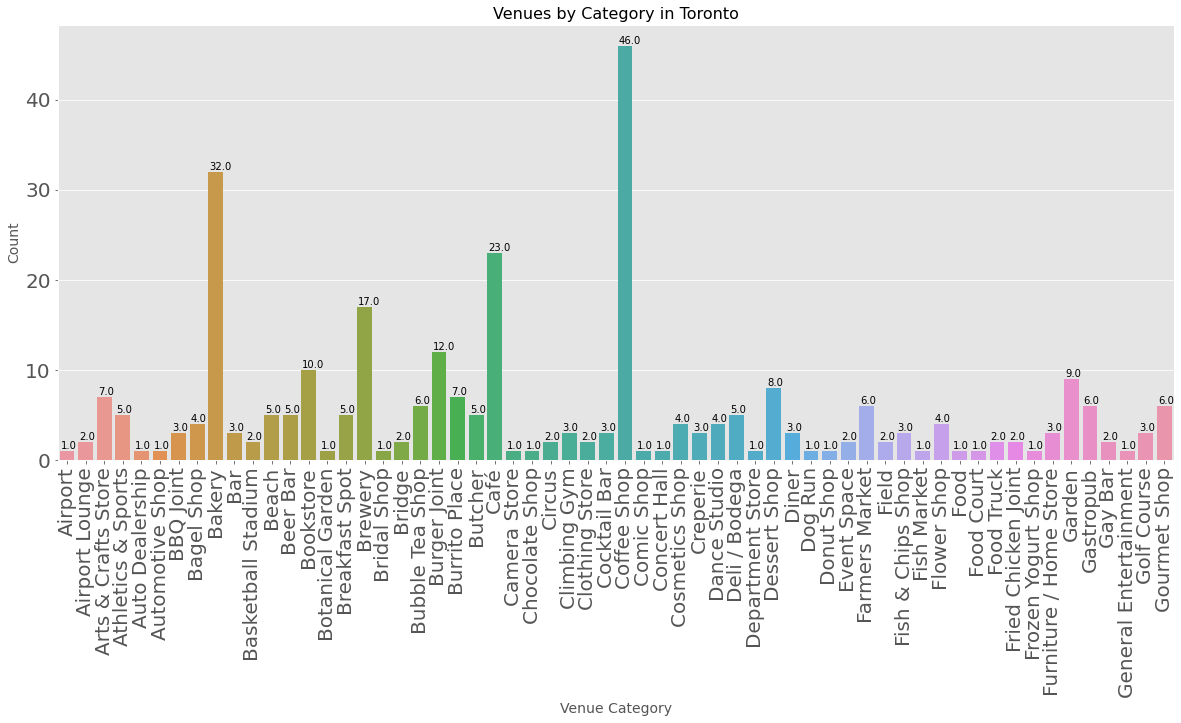

In [112]:
plt.figure(figsize = (20,8))
ax1 = sns.barplot(x="Category",y="Count",data = categories_df.iloc[:60])
ax1.set_xlabel('Venue Category', fontsize = 14)
ax1.set_ylabel('Count', fontsize = 14)

ax1.set_title('Venues by Category in Toronto',fontsize = 16) # set title and labels

ax1.tick_params(labelsize=20)

for num in ax1.patches:# labels ontop of each bar
    width, height = num.get_width(), num.get_height()
    x, y = num.get_xy()
    ax1.annotate('{}'.format(height), (x+0.05, y + height + 0.25))
    

plt.xticks(rotation=90)




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

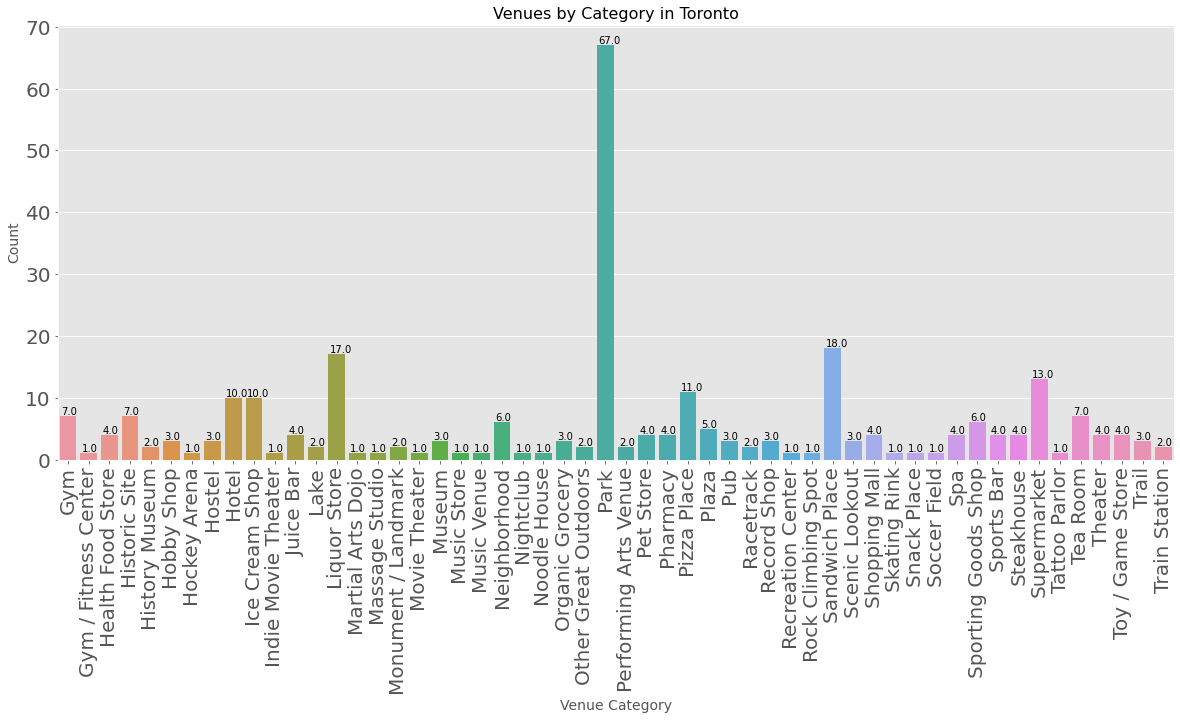

In [113]:
plt.figure(figsize = (20,8))
ax2 = sns.barplot(x="Category",y="Count",data = categories_df.iloc[61:115],)
ax2.set_xlabel('Venue Category', fontsize = 14)
ax2.set_ylabel('Count', fontsize = 14)

ax2.set_title('Venues by Category in Toronto',fontsize = 16) # set title and labels

ax2.tick_params(labelsize=20)

for num in ax2.patches:# labels ontop of each bar
    width, height = num.get_width(), num.get_height()
    x, y = num.get_xy()
    ax2.annotate('{}'.format(height), (x+0.05, y + height + 0.25))
plt.xticks(rotation=90)

We can see that after restaurants, parks and coffee shops are the next most populous venue types.  
#### Next, I want to see how these venues are spead across all the boroughs of Toronto


<h2><a id = "item7"></a>Categories by Borough</h2><a href="#top">back to top</a>

To be honest, I can't think of an efficient way to group the category counts by boroughs. I think I'll have to make a dataframe for each borough and merge them all together.

In [155]:
cat_by_boro = []

In [156]:
for i in range(master_df.shape[0]):
    if "Restaurant" in master_df.iat[i,1]:
        cat_by_boro.append(["Restaurant",master_df.iat[i,5]])
    else:
        cat_by_boro.append([master_df.iat[i,1],master_df.iat[i,5]])

In [157]:
cat_by_boro = pd.DataFrame(cat_by_boro, columns = ['Category','Borough'])

In [207]:
cat_by_boro.head()

,Category,Borough
0,Park,not assigned
1,Recreation Center,North York
2,Bridal Shop,North York
3,Liquor Store,North York
4,Climbing Gym,North York


In [159]:
cat_by_boro['Borough'].unique()

array(['not assigned', 'North York', 'Central Toronto', 'York',
       'Downtown Toronto', 'East Toronto', 'West Toronto', 'Etobicoke',
       'Scarborough', 'East York'], dtype=object)

In [289]:
master_cats = pd.DataFrame(columns = cat_by_boro['Borough'].unique())

In [290]:
master_cats['Category'] = cat_by_boro.drop_duplicates(subset = ['Category'])['Category']

In [291]:
master_cats.head()

,not assigned,North York,Central Toronto,York,Downtown Toronto,East Toronto,West Toronto,Etobicoke,Scarborough,East York,Category
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Park
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Recreation Center
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bridal Shop
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Liquor Store
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Climbing Gym


Gotta make a column for each borough and fill the table with the right data

In [292]:
master_cats.set_index('Category',inplace = True)

This loop will determine the number of each type in venue for each borough and populate the master_cats dataframe 

In [293]:
for col_name in master_cats: # for each column
    for row_index in master_cats.index: # for each row index
        df = pd.DataFrame(cat_by_boro[cat_by_boro['Borough']==col_name])
        count = df.groupby('Category').size()
        if row_index in count:
            master_cats.loc[row_index,col_name] = count[row_index]
        else:
            master_cats.loc[row_index,col_name] = 0

In [307]:
master_cats.head()

,not assigned,North York,Central Toronto,York,Downtown Toronto,East Toronto,West Toronto,Etobicoke,Scarborough,East York
Category,,,,,,,,,,
Park,28,3,5,0,16,4,2,5,3,1
Recreation Center,0,1,0,0,0,0,0,0,0,0
Bridal Shop,0,1,0,0,0,0,0,0,0,0
Liquor Store,2,2,0,1,6,0,0,5,1,0
Climbing Gym,0,1,0,0,0,0,0,2,0,0


Now we can try visualzing the distribution of these venues across all boroughs

Text(0, 0.5, 'Count')

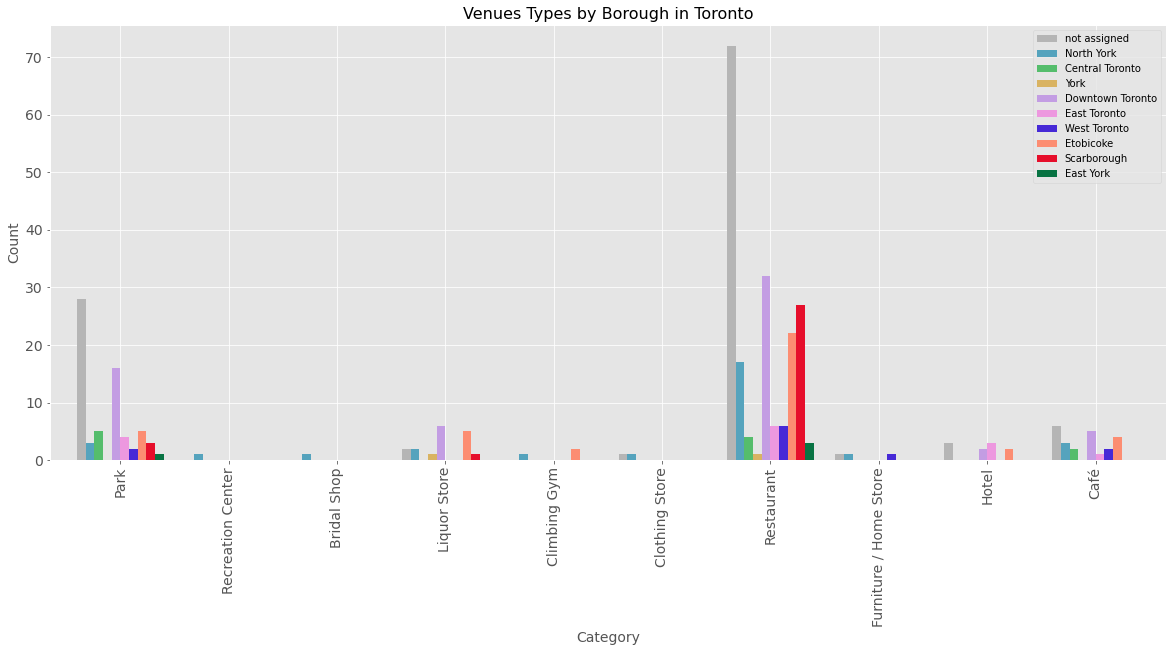

In [313]:
colors = ['#b5b5b5','#55a3bd','#55bd6c','#d9b362','#c39de3','#ed98df', '#4629d6','#fc8d72','#e60e2b','#087343']
ax = master_cats[:10].plot(kind = 'bar', figsize = (20,8), color=colors, width = 0.8, fontsize = 14)

ax.set_title('Venues Types by Borough in Toronto',fontsize = 16) # set title and labels
ax.set_xlabel('Category', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)

There are too many categories to view at once. We would have to make many bar charts. I think i'll skip to the clustering part.